<a href="https://colab.research.google.com/github/justinRH/physics/blob/main/widget_MAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movimiento Oscilatorio de un Péndulo Simple
El péndulo simple es un sistema físico constituido por una cuerda y un objeto atado a su extremo. 

Este cuaderno lo compartí con mis estudiantes de la asignatura Oscilaciones y Ondas (QA302) de la FACYT-UC, para guiar una clase cuyos objetivos fueron:

1. Reconocer al Péndulo Simple como un sistema físico oscilatorio.
2. Reconocer las aproximaciones para que su movimiento sea MAS
3. Identificar el comportamiento del sistema según cambios en las parámetro físicos: longitud de la cuerda y masa del objeto.
4. Estudiar los resultados que se derivan de establecer las condiciones iniciales.


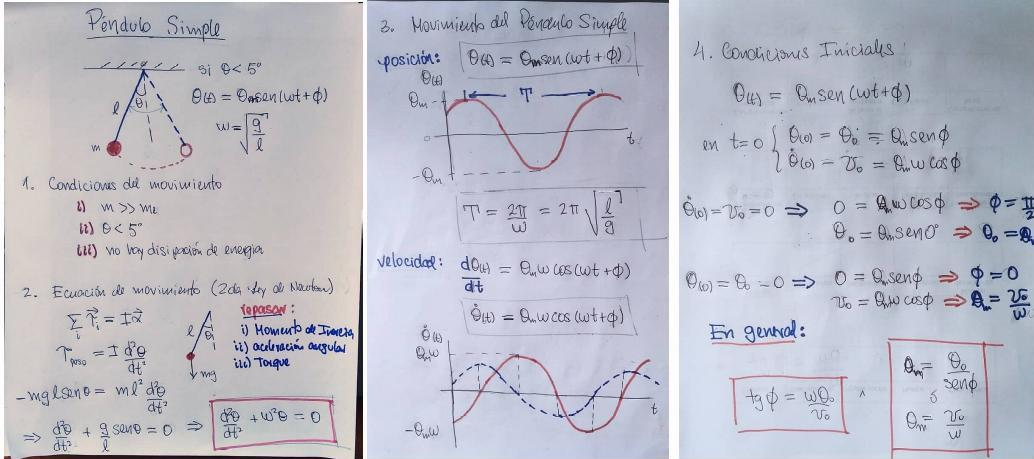


In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
matplotlib inline

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## Oscilaciones de un péndulo con Longitud Variable

In [ ]:
@interact
def plotMAS(
    L = (1,4,.5),
    color = ['red','blue'],
    ):
    
    
    g = 10
    w = 2*np.pi*np.sqrt(g/L)
    
    t=np.arange(0,1,.001)
    x= 2*np.cos(w*t+np.pi)
    
    plt.plot(t,x ,color=color)
    plt.ylabel('desplazamiento [m]')
    plt.xlabel('tiempo [s]')
    plt.grid(True)

interactive(children=(FloatSlider(value=2.0, description='L', max=4.0, min=1.0, step=0.5), Dropdown(descriptio…

## Variaciones de condiciones iniciales

In [ ]:
@interact
def plotMAS(
    L = (1,2,.5),
    xo = (0,2,0.1),
    vo = (0,5,.5),
    ):
    
    
    g = 10
    w = 2*np.pi*np.sqrt(g/L)
    fase = np.arctan( (w*xo) / (vo+0.0001) )
    
    if vo == 0:
        A = xo/np.sin(fase)
    else:
        A = vo/w
        
    t=np.arange(0,0.5,.01)
    x= A*np.sin(w*t+fase)
    
    plt.plot(t,x)
    plt.ylabel('desplazamiento [m]')
    plt.xlabel('tiempo [s]')
    plt.grid(True)

interactive(children=(FloatSlider(value=1.0, description='L', max=2.0, min=1.0, step=0.5), FloatSlider(value=1…

## Energía Mecánica

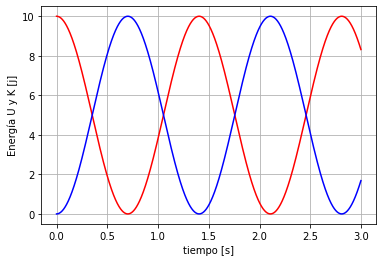

In [6]:
t=np.arange(0,3,.001)
g=10
L = 2
m=1

w=np.sqrt(g/L)

Theta = np.sin(w*t)
W     = w*np.cos(w*t)

# Energía cinética  K=(1/2)*I*W*W  ; I = m*L*L
# Energía potencial U = m*g*h = m*g*L(1-cos(Theta))

K = 0.5*m*L*L*W*W
U = 0.5*m*g*L*Theta*Theta
    
plt.plot(t,K,color='red')
plt.plot(t,U,color='blue')
plt.ylabel('Energía U y K [j]')
plt.xlabel('tiempo [s]')
plt.grid(True)